## Задание 1

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
# Создайте датафреймы X и y из этих данных.

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [3]:
# посмотрим первые строчки
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
# глянем и на цену
y.head(3)

,price
0,24.0
1,21.6
2,34.7


In [5]:
# вот их общий вес
sum(X.memory_usage().values) + sum(y.memory_usage().values)

56928

In [6]:
# прочитаем модуль reduce_mem_usage.ipynb и обработаем данные с помощью функции reduce_mem_usage()
%run reduce_mem_usage.ipynb
reduce_mem_usage(X)
reduce_mem_usage(y)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.88 %
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 48.47 %


In [7]:
# проверим вес ещё раз (почему бы и нет)
sum(X.memory_usage().values) + sum(y.memory_usage().values)

28592

In [8]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью 
# функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом 
# аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [11]:
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

from sklearn.metrics import r2_score

pred_lr = r2_score(y_test, y_pred)
print(f'R2 = {pred_lr}')

R2 = 0.7112277761068975


## Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [12]:
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [13]:
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression
# Сделайте предсказание на тестовых данных

model.fit(X_train, y_train.values[:, 0])
model_y_pred = model.predict(X_test)

In [14]:
# и посчитайте R2

pred_rfr = r2_score(y_test, model_y_pred)
print(f'R2 = {pred_rfr}')

R2 = 0.8773496816736008


In [15]:
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.

if (pred_lr - pred_rfr) > 0:
    print(f'модель на LinearRegression показала результат лучше на {pred_lr - pred_rfr}')
else:
    print(f'модель на RandomForestRegressor показала результат лучше на {round(abs(pred_lr - pred_rfr), 4)}')

модель на RandomForestRegressor показала результат лучше на 0.1661


## *Задание 3

Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.


In [16]:
# Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

help(model)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ---------

In [17]:
# а вот конкретная справка по feature_importances_ (пора подтягивать английский, пора)
help(RandomForestRegressor.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



In [18]:
# С помощью этого атрибута найдите сумму всех показателей важности
# установите, какие два признака показывают наибольшую важность

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_2 = feature_importances.head(2)

print(f'признаки:\n{feature_importances}\n{"--" * 30}\nих сумма = {round(feature_importances.sum())}\n\
{"--" * 30}\n2 самых важных:\n{top_2}')

признаки:
LSTAT      0.415785
RM         0.403072
DIS        0.064885
CRIM       0.029315
PTRATIO    0.017735
AGE        0.014766
NOX        0.014441
B          0.012341
TAX        0.012201
INDUS      0.007338
RAD        0.005459
ZN         0.001479
CHAS       0.001182
dtype: float64
------------------------------------------------------------
их сумма = 1
------------------------------------------------------------
2 самых важных:
LSTAT    0.415785
RM       0.403072
dtype: float64


## Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.

Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df. С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100. Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы:
test_size=0.3, random_state=100, stratify=y. У вас должны получиться объекты X_train, X_test, y_train и y_test. Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры: parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами: estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3. Обучите модель на тренировочном наборе данных (может занять несколько минут). Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba. Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score. Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [19]:
# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
# Загрузите датасет creditcard.csv и создайте датафрейм df
df = pd.read_csv('creditcard.csv')

# и сразу сделаем его "полегче" с помощью функции reduce_mem_usage()
reduce_mem_usage(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.21 %


In [21]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована

df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [23]:
# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [24]:
# Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
# pd.options.display.max_columns = 100.
# Просмотрите первые 10 строк датафрейма df.

# вот так отображалось
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0


In [25]:
pd.options.display.max_columns = 100

# а теперь отображаются все строки, красота
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686132,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.199997,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


In [26]:
# Создайте датафрейм X из датафрейма df, исключив столбец Class.
# Создайте объект Series под названием y из столбца Class
target = 'Class'
y = df[target]
X = df.drop(target, axis=1)

# проверим типы данных, чтоб было всё как и надо по заданию
print(f'type(X) = {type(X)}\ntype(y) = {type(y)}')

type(X) = <class 'pandas.core.frame.DataFrame'>
type(y) = <class 'pandas.core.series.Series'>


In [27]:
# все верно - DataFrame из одного признака - это всегда тип данных Series

In [28]:
X.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004


In [29]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int8

In [30]:
# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы:
# test_size=0.3, random_state=100, stratify=y.
# У вас должны получиться объекты X_train, X_test, y_train и y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Просмотрите информацию о их форме.

print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test:  {X_test.shape}\ny_test:  {y_test.shape}')

X_train: (199364, 30)
y_train: (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


In [31]:
# Для поиска по сетке параметров задайте такие параметры: 
# parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]

# Создайте модель GridSearchCV со следующими аргументами: 
# estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parameters,
                   scoring='roc_auc',
                   cv=3)

In [32]:
%%time
# Обучите модель на тренировочном наборе данных (может занять несколько минут).

# а мы ещё и посчитаем-с, сколько там минут наша модель собралась обучаться

clf.fit(X_train, y_train)

Wall time: 1min 45s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [33]:
# Просмотрите параметры лучшей модели с помощью атрибута best_params_.

clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [34]:
# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 
# (вероятность класса 1) и запишите в массив y_pred_proba

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [35]:
# Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

from sklearn.metrics import roc_auc_score

# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, 
# используя в качестве аргументов массивы y_test и y_pred_proba.

roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

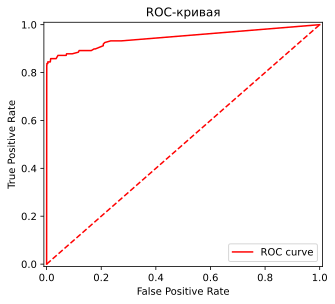

In [36]:
# ну и построим график чтоль:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

import matplotlib.pyplot as plt
from pylab import rcParams
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='red', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()